In [2]:
# For reading data set
# importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
cal=pd.read_csv("calories_consumed.csv")

In [4]:
cal.columns

Index(['Weight gained (grams)', 'Calories Consumed'], dtype='object')

In [5]:
cal.columns=("wgg","cc") # Changing the column names as per our requirement

In [6]:
cal.columns

Index(['wgg', 'cc'], dtype='object')

(array([6., 2., 2., 0., 0., 1., 1., 0., 1., 1.]),
 array([  62. ,  165.8,  269.6,  373.4,  477.2,  581. ,  684.8,  788.6,
         892.4,  996.2, 1100. ]),
 <a list of 10 Patch objects>)

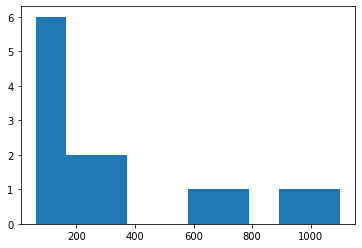

In [7]:
plt.hist(cal.wgg)

(array([3., 1., 2., 2., 1., 2., 1., 0., 1., 1.]),
 array([1400., 1650., 1900., 2150., 2400., 2650., 2900., 3150., 3400.,
        3650., 3900.]),
 <a list of 10 Patch objects>)

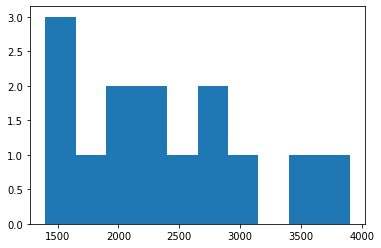

In [8]:
plt.hist(cal.cc)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b3f4b0bfc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1b3f4b10b08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b3f4b0b808>],
 'medians': [<matplotlib.lines.Line2D at 0x1b3f4b10c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b3f4b17b48>],
 'means': []}

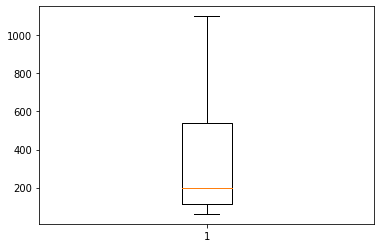

In [9]:
plt.boxplot(cal.wgg)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b3f4b759c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1b3f4b79988>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b3f4b6efc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1b3f4b7d908>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b3f4b7df48>],
 'means': []}

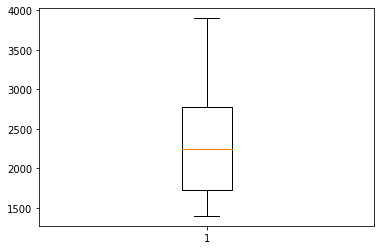

In [10]:
plt.boxplot(cal.cc)

Text(0, 0.5, 'cc')

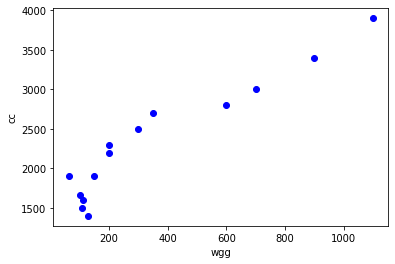

In [11]:
plt.plot(cal.wgg,cal.cc,"bo");plt.xlabel("wgg");plt.ylabel("cc")

In [12]:
cal.wgg.corr(cal.cc) # Strong Positive correlation to each other 

0.9469910088554458

In [13]:
cal.head()

,wgg,cc
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


In [14]:
cal.tail()

,wgg,cc
9,1100,3900
10,100,1670
11,150,1900
12,350,2700
13,700,3000


In [15]:
cal.shape #  How many rows and how many columns we can see 

(14, 2)

In [16]:
# For preparing linear regression model we need to import the statsmodels.formula.api
import statsmodels.formula.api as smf
model=smf.ols("cc~wgg",data=cal).fit()

In [17]:
# For getting coefficients of the varibles used in equation
model.params

Intercept    1577.200702
wgg             2.134423
dtype: float64

In [18]:
# P-values for the variables and R-squared value for prepared model
model.summary() # Pvalue is very low and my R^2 value is 89% so my model is predicted good 

C:\Users\anilkrishna\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     cc   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           2.86e-07
Time:                        19:34:58   Log-Likelihood:                -96.170
No. Observations:                  14   AIC:                             196.3
Df Residuals:                      12   BIC:                             197.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1577.2007    100.541     15.687      0.000    1358.141    1796.260
wgg            2.1344      0.209     10.211      0.000       1.679       2.590
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   2.308
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.425
Skew:                          -0.098   Prob(JB):                        0.808
Kurtosis:                       2.169   Cond. No.                         719.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
print (model.conf_int(0.05)) # 95% confidence interval

                     0            1
Intercept  1358.141455  1796.259949
wgg           1.678994     2.589852


In [20]:
pred = model.predict(cal.iloc[:,0]) # Predicted values of Salary_hike  using the model

Text(0, 0.5, 'cc')

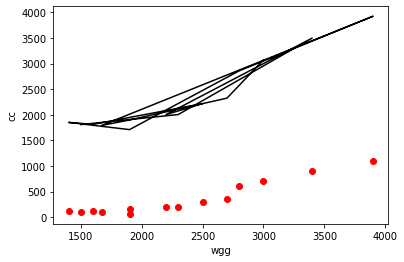

In [21]:
# Visualization of regresion line over the scatter plot of Churn_out_rate and Salary_hike
# For visualization we need to import matplotlib.pyplot
import matplotlib.pylab as plt
plt.scatter(x=cal['cc'],y=cal['wgg'],color='red');plt.plot(cal['cc'],pred,color='black');plt.xlabel('wgg');plt.ylabel("cc")


In [22]:
# Transforming variables for accuracy
model2 = smf.ols('cc~np.log(wgg)',data=cal).fit()
model2.params
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     cc   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     86.04
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           8.02e-07
Time:                        19:46:48   Log-Likelihood:                -97.363
No. Observations:                  14   AIC:                             198.7
Df Residuals:                      12   BIC:                             200.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1911.1244    464.188     -4.117      0.001   -2922.503    -899.746
np.log(wgg)   774.1735     83.462      9.276      0.000     592.326     956.021
==============================================================================
Omnibus:                        4.026   Durbin-Watson:                   3.009
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                1.659
Skew:                           0.772   Prob(JB):                        0.436
Kurtosis:                       3.679   Cond. No.                         36.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Exponential transformation
model3 = smf.ols('np.log(cc)~wgg',data=cal).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(cc)   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     50.40
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           1.25e-05
Time:                        19:47:33   Log-Likelihood:                 8.3130
No. Observations:                  14   AIC:                            -12.63
Df Residuals:                      12   BIC:                            -11.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4068      0.058    128.367      0.000       7.281       7.533
wgg            0.0009      0.000      7.100      0.000       0.001       0.001
==============================================================================
Omnibus:                        0.488   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.783   Jarque-Bera (JB):                0.559
Skew:                          -0.317   Prob(JB):                        0.756
Kurtosis:                       2.254   Cond. No.                         719.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion : My Model gave me good Accuracy which is 89% compared to other models 
# So we can say our model is strongly predicted the the weight gained using calories consuming